In [1]:
import bs4 as bs
import requests
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import os
import numpy as np
import matplotlib.pyplot as plt


start = dt.datetime(2015,1,1)
end = dt.datetime.today()

In [2]:
# gets sp500 constituent's tickers from wikipedia

dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', header = 0)

wiki_table = dfs[0]

tickers = wiki_table['Symbol'].str.replace('.','-')

In [3]:
# gets tickers data from yahoo and set a df for Adj Close and a df for Volume

df_adjClose = pd.DataFrame()
df_vol = pd.DataFrame()
for count, ticker in enumerate(tickers):
    ticker_data = web.DataReader(ticker,'yahoo', start, end)
    df_adjClose[ticker] = ticker_data['Adj Close']
    df_vol[ticker] = ticker_data['Volume']
    
    if count % 10 == 0:
        print(count, end='\r')

In [4]:
# generates a return's correlations df

df_returns = pd.DataFrame()

for column in df_adjClose:
    df_returns[column] = np.log(df_adjClose[column]/df_adjClose[column].shift(1))

df_returns.dropna(inplace = True)

In [5]:
df_corr = pd.DataFrame()

df_corr = df_returns.corr()

df_corr

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.486336,0.407408,0.177873,0.587601,0.532480,0.466929,0.414561,0.501061,0.546158,...,0.564905,0.612826,0.187461,0.554683,0.629329,0.813374,0.175279,0.176031,0.338004,0.345870
ABT,0.486336,1.000000,0.408531,0.267440,0.659273,0.491133,0.672118,0.525411,0.344352,0.359100,...,0.700883,0.466379,0.470104,0.372359,0.440767,0.536289,0.497909,0.345753,0.371324,0.673859
ABBV,0.407408,0.408531,1.000000,0.215594,0.488515,0.447055,0.469194,0.499215,0.407605,0.396067,...,0.539363,0.510682,0.308858,0.361433,0.283616,0.445489,0.299498,0.349483,0.431171,0.355137
ABMD,0.177873,0.267440,0.215594,1.000000,0.019915,-0.100079,0.081288,0.133074,0.104527,-0.194057,...,0.026341,0.348928,-0.221210,0.158056,0.186188,0.255003,-0.497286,-0.056717,0.421449,-0.015370
ACN,0.587601,0.659273,0.488515,0.019915,1.000000,0.767724,0.847996,0.643434,0.488435,0.494287,...,0.840691,0.575560,0.599269,0.645864,0.544130,0.704136,0.539768,0.452276,0.474420,0.666029
ATVI,0.532480,0.491133,0.447055,-0.100079,0.767724,1.000000,0.710352,0.423823,0.381116,0.455148,...,0.597109,0.428455,0.519089,0.439794,0.359074,0.574609,0.512728,0.369601,0.226229,0.455886
ADBE,0.466929,0.672118,0.469194,0.081288,0.847996,0.710352,1.000000,0.668180,0.401364,0.433036,...,0.744921,0.532041,0.556771,0.614092,0.544233,0.619306,0.472527,0.363052,0.417017,0.644814
AMD,0.414561,0.525411,0.499215,0.133074,0.643434,0.423823,0.668180,1.000000,0.347039,0.405129,...,0.701139,0.529677,0.501474,0.468628,0.588505,0.563340,0.359409,0.442186,0.403700,0.536952
AAP,0.501061,0.344352,0.407605,0.104527,0.488435,0.381116,0.401364,0.347039,1.000000,0.255966,...,0.538163,0.462668,0.415741,0.449988,0.327879,0.518687,0.281770,0.366057,0.247820,0.448829
AES,0.546158,0.359100,0.396067,-0.194057,0.494287,0.455148,0.433036,0.405129,0.255966,1.000000,...,0.452535,0.375061,0.452088,0.498535,0.401207,0.349858,0.412536,0.427633,0.251806,0.139519


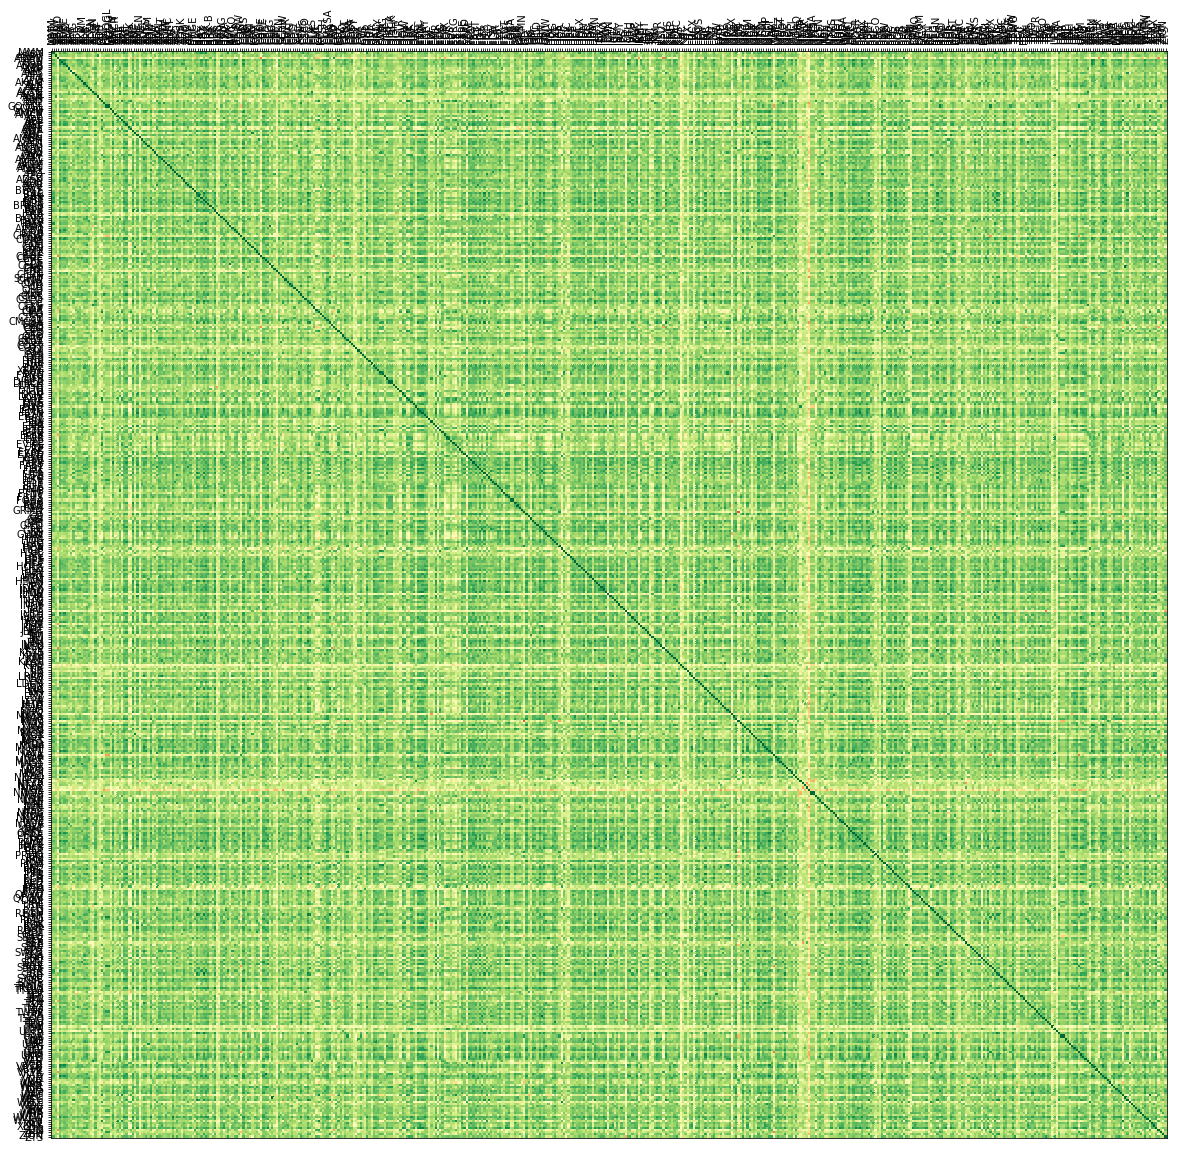

In [6]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
heatmap = ax.pcolor(df_corr.values, cmap = 'RdYlGn')
heatmap.set_clim(-1,1)
column_labels = df_corr.columns
row_lables = df_corr.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_lables)
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation = 'vertical')
ax.set_xticks(np.arange(df_corr.values.shape[0]) + 0.5, minor = False)
ax.set_yticks(np.arange(df_corr.values.shape[0]) + 0.5, minor = False)

heatmap